In [41]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as transforms
import matplotlib.cm as cm
from utils import SoccerBallDataset
from skimage.feature import peak
from torch.nn.functional import interpolate
import torch.nn as nn
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x57982000 @  0x7f40675702a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [10]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

    100% |████████████████████████████████| 5.7MB 7.8MB/s 
  Found existing installation: Pillow 5.4.1
    Uninstalling Pillow-5.4.1:
      Successfully uninstalled Pillow-5.4.1
  [PIL]
You must restart the runtime in order to use newly installed versions.


In [0]:
!mv data.csv data/train

In [15]:
dataset = SoccerBallDataset("data/train/data.csv", "data/train", downsample=4, delimiter=";")
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=1)

for data in dataloader:
    img = np.array(data['image'][0])
    sgnl = np.array(data['signal'][0])
    img_name = data['img_name'][0]
    break

print("Analyzing: ", img_name)
# print(img.shape)
# print(sgnl.shape)
# print(boxes)

Computing teacher signals...
The image 00278.jpg does not have a ball in it !
The image 00253.jpg does not have a ball in it !
The image 00120.jpg does not have a ball in it !
The image 00280.jpg does not have a ball in it !
The image 00109.jpg does not have a ball in it !
The image 00057.jpg does not have a ball in it !
The image 00224.jpg does not have a ball in it !
The image 00236.jpg does not have a ball in it !
The image 00212.jpg does not have a ball in it !
The image 00006.jpg does not have a ball in it !
The image 00188.jpg does not have a ball in it !
The image 00113.jpg does not have a ball in it !
The image 00259.jpg does not have a ball in it !
The image 00264.jpg does not have a ball in it !
The image 00106.jpg does not have a ball in it !
The image 00263.jpg does not have a ball in it !
The image 00276.jpg does not have a ball in it !
The image 00260.jpg does not have a ball in it !
The image 00103.jpg does not have a ball in it !
The image 00117.jpg does not have a ball

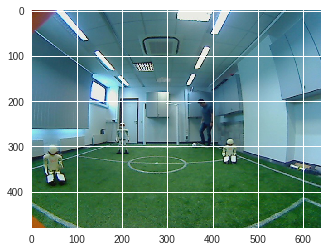

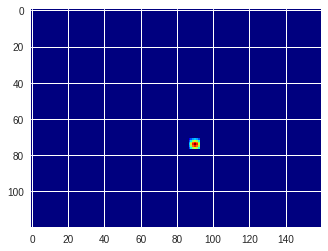

In [13]:
plt.imshow(img.transpose(1, 2, 0))
plt.show()

plt.imshow(sgnl, cmap=cm.jet)
plt.show()

In [0]:
peak.peak_local_max(sgnl, min_distance=1, threshold_rel=0)

array([[ 60, 108],
       [ 60, 107]])

In [0]:
boxes

NameError: name 'boxes' is not defined

In [0]:
xmin = int(boxes[0][0][0])
ymin = int(boxes[0][1][0])
xmax = int(boxes[0][2][0])
ymax = int(boxes[0][3][0])
c_x = xmin + (xmax - xmin) // 2
c_y = ymin + (ymax - ymin) // 2
print("ymin={}, xmin={}, ymax={}, xmax={}, c_y={}, c_x={}".format(ymin, xmin, ymax, xmax, c_y, c_x))

ymin=219, xmin=407, ymax=266, xmax=456, c_y=242, c_x=431


In [0]:
class SweatyNet1(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(
                nn.Conv2d(3, 8, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(8)
            )

        self.max_pool_1 = nn.MaxPool2d(2, stride=2)

        self.layer2 = nn.Sequential(
                nn.Conv2d(8, 16, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(16),

                nn.Conv2d(16, 16, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(16)
            )

        self.max_pool_2 = nn.MaxPool2d(2, stride=2)

        self.layer3 = nn.Sequential(
                nn.Conv2d(24, 32, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(32),

                nn.Conv2d(32, 32, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(32)
            )

        self.max_pool_3 = nn.MaxPool2d(2, stride=2)

        self.layer4 = nn.Sequential(
                nn.Conv2d(56, 64, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(64),

                nn.Conv2d(64, 64, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(64),

                nn.Conv2d(64, 64, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(64)
            )

        self.max_pool_4 = nn.MaxPool2d(2, stride=2)

        self.layer5 = nn.Sequential( 
                nn.Conv2d(120, 128, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(128),

                nn.Conv2d(128, 128, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(128),

                nn.Conv2d(128, 128, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(128),

                nn.Conv2d(128, 64, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(64),
            )

        self.layer6 = nn.Sequential(
                nn.Conv2d(184, 64, 1), 
                nn.ReLU(),
                nn.BatchNorm2d(64),

                nn.Conv2d(64, 32, 3, padding=1), 
                nn.ReLU(),
                nn.BatchNorm2d(32),

                nn.Conv2d(32, 32, 3, padding=1), 
                nn.ReLU(),
                nn.BatchNorm2d(32)
            )


        self.layer7 = nn.Sequential(
                nn.Conv2d(88, 16, 1), 
                nn.ReLU(), 
                nn.BatchNorm2d(16), 

                nn.Conv2d(16, 16, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(16), 

                nn.Conv2d(16, 8, 3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(8)
            )


    def forward(self, x):
        x = self.layer1(x)

        out_pool = self.max_pool_1(x)
        x = self.layer2(out_pool)
        x = torch.cat((out_pool, x), 1)

        out_pool = self.max_pool_2(x)
        x = self.layer3(out_pool)
        o_1 = torch.cat((out_pool, x), 1)

        out_pool = self. max_pool_3(o_1)
        x = self.layer4(out_pool)
        o_2 = torch.cat((out_pool, x), 1)

        out_pool = self.max_pool_4(o_2)
        x = self.layer5(out_pool)
        x = interpolate(x, scale_factor=2, mode='bilinear', align_corners=True)

        x = torch.cat((o_2, x), 1)
        x = self.layer6(x)
        x = interpolate(x, scale_factor=2, mode='bilinear', align_corners=True)

        x = torch.cat((o_1, x), 1)

        out = self.layer7(x)

        return out

In [44]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


dataset = SoccerBallDataset("data/train/data.csv", "data/train", downsample=4, delimiter=";")
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=1)

model = SweatyNet1()
model = model.to(device)


criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())


Computing teacher signals...
Elapsed: 4.668339 sec.


In [45]:
i = 0
epochs = 1
for epoch in range(epochs):
    for data in dataloader:
        optimizer.zero_grad()
        
        image = data['image'].type(torch.FloatTensor).to(device)
        signals = data['signal'].type(torch.FloatTensor).to(device)
        out = model(image)

        loss = criterion(signals, out)

        loss.backward()
        optimizer.step()
        
        print("Loss: {}".format(loss.item()))
        i += 1
        if i > 2:
            break

torch.Size([4, 8, 120, 160])
torch.Size([4, 8, 120, 160])
torch.Size([4, 8, 120, 160])
